# What does the data look like for n=1,2,5?

---

First load everything:

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [41]:

from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import bilby_priors_dict
import logging 
import numpy as np 
from plotting import plot_observations



def generate_data(num_gw_sources,σm,set_parameters_as_known):

    #h = 5e-12
    #measurement_model='pulsar'
    #seed = 1237
    #num_gw_sources = 2

    #Setup the system
    P   = SystemParameters(σp=None,σm=σm,num_gw_sources=num_gw_sources) # define the system parameters as a dict. Todo: make this a class
    PTA = Pulsars(P)                                       # setup the PTA
    data = SyntheticData(PTA,P)                            # generate some synthetic data



    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    #Run the KF once with the correct parameters.
    #This allows JIT precompile

    init_parameters_optimal, priors_optimal = bilby_priors_dict(PTA,P,set_parameters_as_known=set_parameters_as_known)
    optimal_parameters = priors_optimal.sample(1)
    model_likelihood,xp,yp = KF.likelihood_with_results(optimal_parameters)


    plot_observations(data,xp,yp)


    #return data.t, data.f_measured[:,1],xp[:,1],yp[:,1]

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement model
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


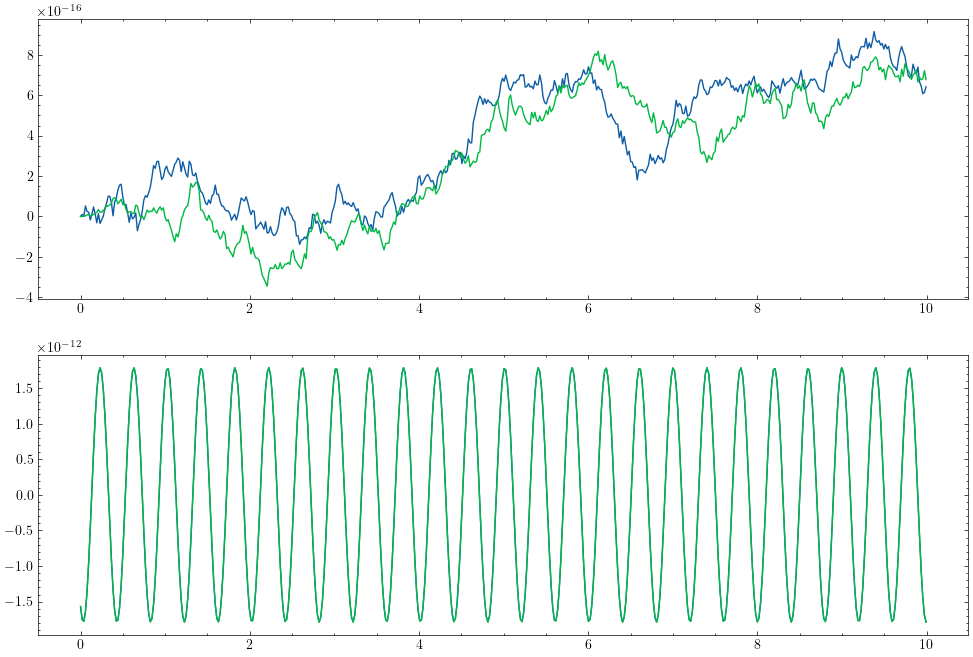

In [54]:
sigma = 1e-15
generate_data(1,sigma,set_parameters_as_known=True)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly


INFO:root:You are including the PSR terms in your synthetic data generation


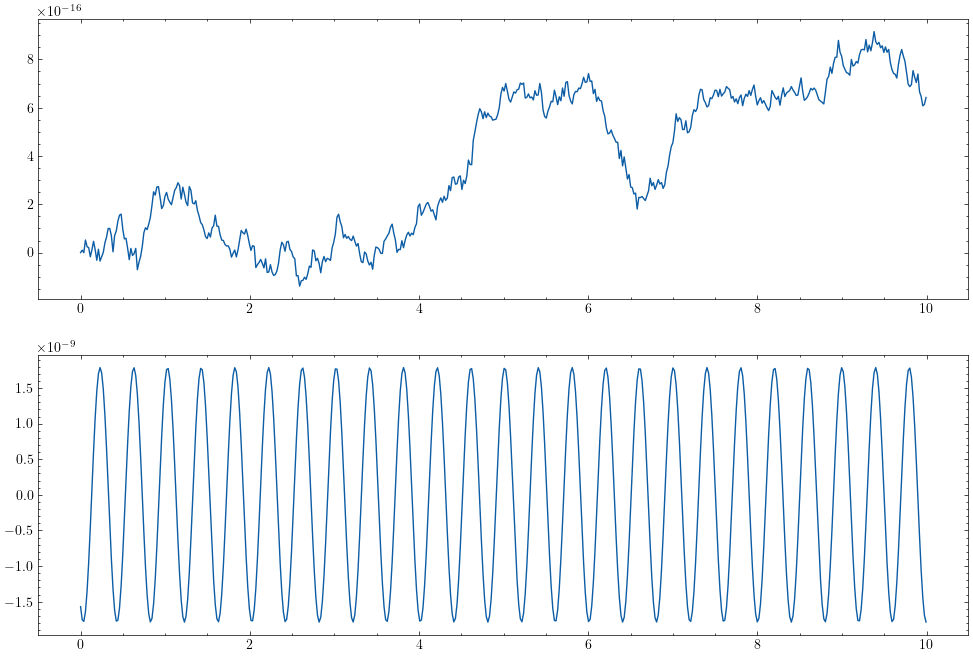

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Running for two deterministic GW sources
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


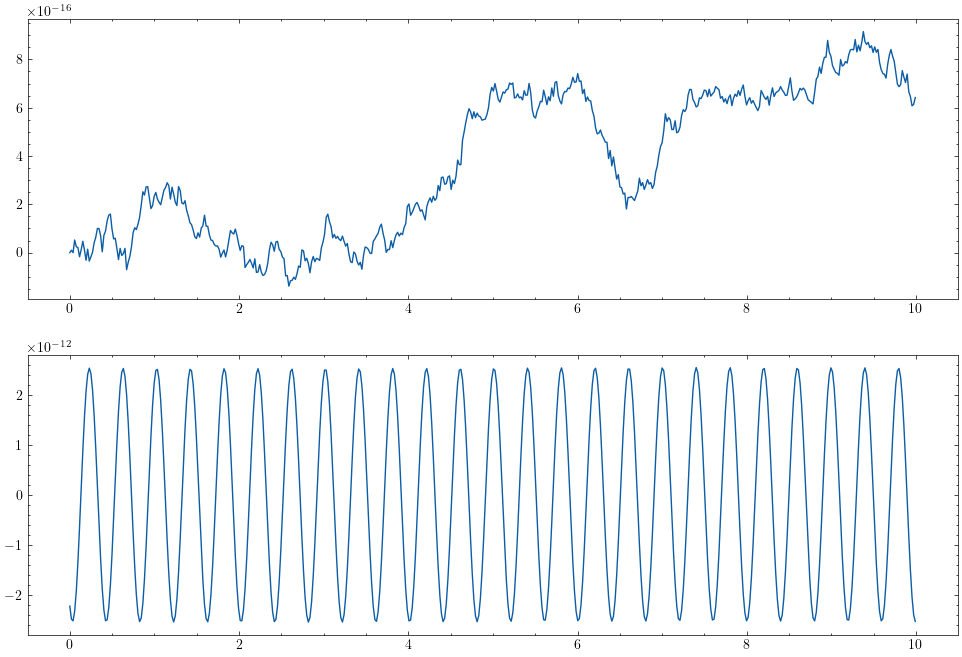

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Running for five deterministic GW sources
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


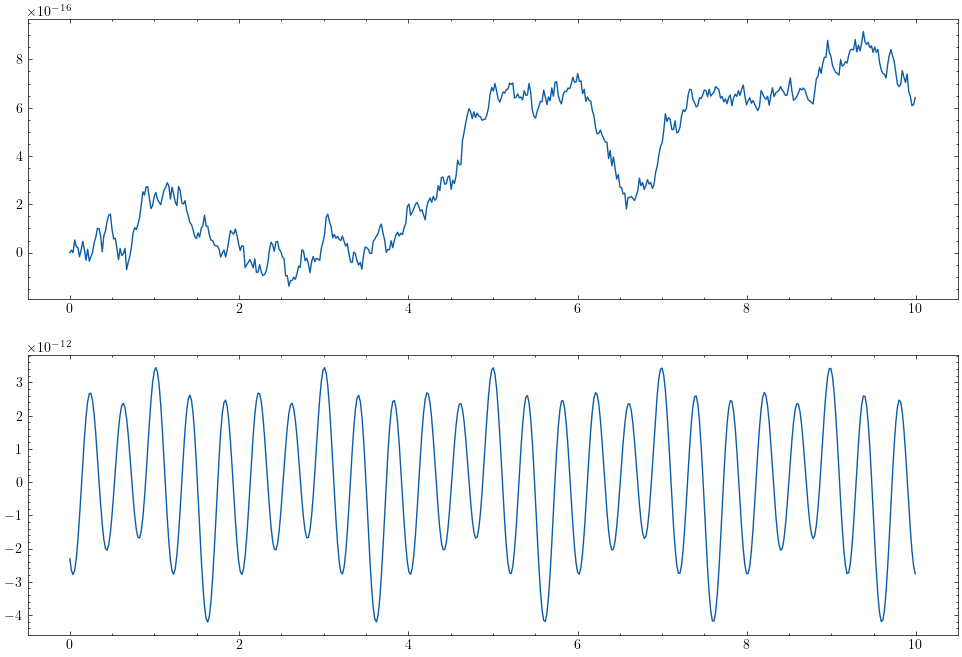

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


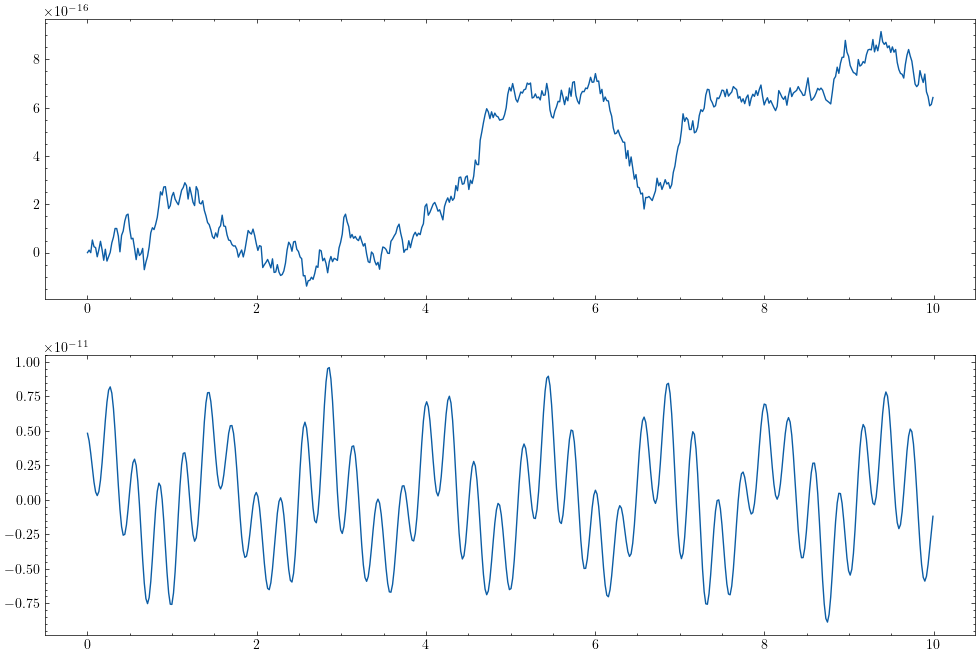

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


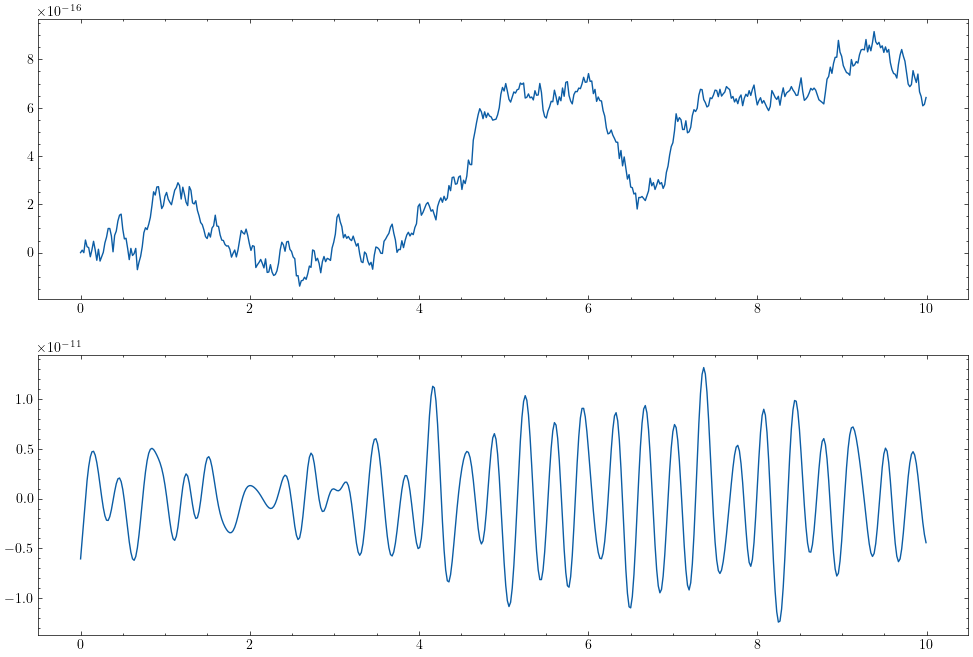

In [49]:
sigma = 0.0 #zero noise so we can see the GW effect
t,data_1 = generate_data(1,sigma)
t,data_2 = generate_data(2,sigma)
t,data_5 = generate_data(5,sigma)
t,data_10 = generate_data(10,sigma)
t,data_20 = generate_data(20,sigma)

In [52]:
t,data_20 = generate_data(100000,sigma)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


INFO:root:You are assigning the σp terms randomly


In [26]:
data2 = data.f_measured[:,1]

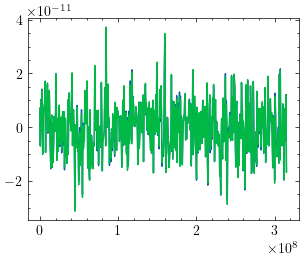

In [30]:
import matplotlib.pyplot as plt 
plt.plot(data.t,data1)
plt.plot(data.t,data2)

In [1]:
import numpy as np 

In [3]:
num_gw_sources = 20
iota = np.ones(num_gw_sources)

In [4]:
iota

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])